In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline

sns.set()

In [81]:
test_df=pd.read_csv("Basedatos/titanic-test.csv")
train_df=pd.read_csv("Basedatos/titanic-train.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


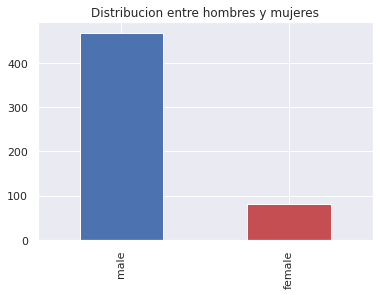

In [83]:
train_df[train_df.Survived==0].Sex.value_counts().plot(kind="bar",color=["b","r"])
plt.title("Distribucion entre hombres y mujeres")
plt.show()

In [84]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

encoder_sex=label_encoder.fit_transform(train_df["Sex"])

train_df["Sex"]=encoder_sex
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


LLenado datos vacios con .fillna

Realizar cambios con datos inutiles con .drop()


In [85]:
train_df["Age"]=train_df["Age"].fillna(train_df["Age"].median())
train_df["Embarked"]=train_df["Embarked"].fillna("S")


train_predictors=train_df.drop(["PassengerId","Survived","Name","Ticket","Cabin"],axis=1)
categorical_cols = [cname for cname in train_predictors.columns if 
                        train_predictors[cname].nunique()<10 and
                        train_predictors[cname].dtype=="object"
                    ]



In [86]:
numerical_cols = [cname for cname in train_predictors.columns if 
                        train_predictors[cname].dtype in ["int64","float64"]
                    ]

In [87]:
mycols=categorical_cols+numerical_cols
mycols
train_predictors=train_predictors[mycols]
train_predictors

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare
0,S,3,1,22.0,1,0,7.2500
1,C,1,0,38.0,1,0,71.2833
2,S,3,0,26.0,0,0,7.9250
3,S,1,0,35.0,1,0,53.1000
4,S,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,S,2,1,27.0,0,0,13.0000
887,S,1,0,19.0,0,0,30.0000
888,S,3,0,28.0,1,2,23.4500
889,C,1,1,26.0,0,0,30.0000


In [88]:
dummy_encoded_train_predictors=pd.get_dummies(train_predictors)
dummy_encoded_train_predictors

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,0,1
887,1,0,19.0,0,0,30.0000,0,0,1
888,3,0,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [89]:
y_target=train_df["Survived"].values
x_feature_one=dummy_encoded_train_predictors.values

x_train, x_validation ,y_train,y_validation= train_test_split(x_feature_one,y_target,test_size=25,random_state=1)

In [99]:
tree_ones=tree.DecisionTreeClassifier()
tree_ones.fit(x_train,y_train)

DecisionTreeClassifier()

In [100]:
tree_one_accuracy=tree_ones.score(x_validation,y_validation)
print("Accuracy:%0.4f"%(tree_one_accuracy))

Accuracy:0.7600


# Visualizacion del arbol

In [ ]:
from io import StringIO
